##基本图像分类：对服装图像进行分类

该指南训练了一个神经网络模型，以对运动鞋和衬衫等服装的图像进行分类。如果您不了解所有详细信息，也可以；这是完整的TensorFlow程序的快速概述，详细内容随您进行。

本指南使用tf.keras（高级API）在TensorFlow中构建和训练模型。

In [0]:
%tensorflow_version 2.x

In [0]:
from __future__ import absolute_import,division,print_function,unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


###导入Fashion MNIST数据集
本指南使用Fashion MNIST数据集，其中包含10个类别的70,000个灰度图像。图像显示了低分辨率（28 x 28像素）的单个衣​​物，如下所示：

---
![替代文字](https://tensorflow.org/images/fashion-mnist-sprite.png)
---
Fashion MNIST旨在替代经典MNIST数据集，通常被用作计算机视觉机器学习程序的“ Hello，World”。MNIST数据集包含手写数字（0、1、2等）的图像，格式与您将在此处使用的衣服的格式相同。

本指南将Fashion MNIST用于多种用途，并且因为它比常规MNIST更具挑战性。两个数据集都相对较小，用于验证算法是否按预期工作。它们是测试和调试代码的良好起点。

在这里，使用60,000张图像来训练网络，使用10,000张图像来评估网络学习对图像进行分类的准确程度。您可以直接从TensorFlow访问Fashion MNIST。直接从TensorFlow导入和加载Fashion MNIST数据：

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

加载数据集将返回四个NumPy数组：

* 在train_images和train_labels阵列的训练集 -The数据模型用来学习。
* 针对测试集，和test_images，对模型进行了测试test_labels。

图像是28x28 NumPy数组，像素值范围是0到255。标签是整数数组，范围是0到9。这些对应于图像表示的衣服类别：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

每个图像都映射到一个标签。由于类名不包含在数据集中，因此将它们存储在此处以供以后在绘制图像时使用：

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###探索数据
在训练模型之前，让我们探索数据集的格式。下图显示了训练集中有60,000张图像，每张图像表示为28 x 28像素：

In [0]:
train_images.shape

(60000, 28, 28)

同样，训练集中有60,000个标签：

In [0]:
len(train_labels)

60000

每个标签都是0到9之间的整数：

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有10,000张图像。同样，每个图像都表示为28 x 28像素：

In [0]:
test_images.shape

(10000, 28, 28)

测试集包含10,000个图像标签：

In [0]:
len(test_labels)

10000

###预处理数据
在训练网络之前，必须对数据进行预处理。如果检查训练集中的第一张图像，您将看到像素值落在0到255的范围内：

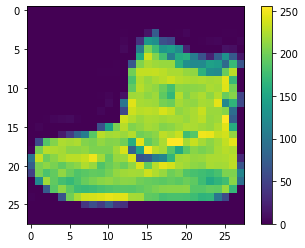

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

在将它们输入神经网络模型之前，将这些值缩放到0到1的范围。为此，将值除以255。以相同的方式预处理训练集和测试集非常重要：

In [0]:
train_images = train_images /255.0
test_image = test_images /255.0

为了验证数据的格式正确，并准备好构建和训练网络，让我们显示训练集中的前25张图像，并在每个图像下方显示类别名称。

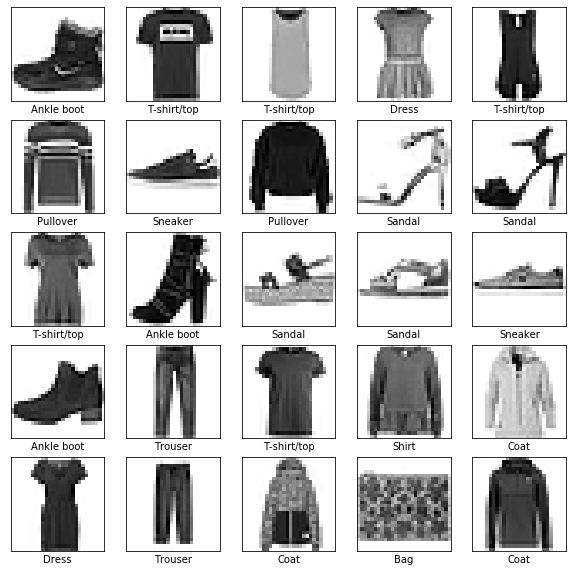

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

###建立模型
建立神经网络需要配置模型的各层，然后编译模型。

###设置图层
神经网络的基本组成部分是层。图层从输入到其中的数据中提取表示。希望这些表示对于当前的问题有意义。

深度学习的大部分内容是将简单的层链接在一起。大多数层（例如tf.keras.layers.Dense）具有在训练期间学习的参数。

In [0]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])

该网络的第一层tf.keras.layers.Flatten将图像的格式从二维数组（28 x 28像素）转换为一维数组（28 * 28 = 784像素）。可以将这一层看作是堆叠图像中的像素行并对齐它们。该层没有学习参数。它只会重新格式化数据。

像素变平后，网络由tf.keras.layers.Dense两层序列组成。这些是紧密连接或完全连接的神经层。第一Dense层有128个节点（或神经元）。第二层（也是最后一层）是一个10节点的softmax层，该层返回10个总和为1的概率分数的数组。每个节点都包含一个分数，该分数指示当前图像属于10个类别之一的概率。

###编译模型
在准备训练模型之前，需要进行一些其他设置。这些是在模型的编译步骤中添加的：

* 损失函数 -衡量训练期间模型的准确性。您希望最小化此功能，以在正确的方向上“引导”模型。
* 优化器 -这是基于模型看到的数据及其损失函数来更新模型的方式。
*　指标 -用于监视培训和测试步骤。以下示例使用precision，即正确分类的图像比例。

In [0]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

###训练模型
训练神经网络模型需要执行以下步骤：

1. 将训练数据输入模型。在此示例中，训练数据在train_images和train_labels数组中。
2. 该模型学习关联图像和标签。
3. 您要求模型对测试集（在本例中为test_images数组）做出预测。验证预测是否与test_labels阵列中的标签匹配。

要开始训练，请调用该model.fit方法，之所以这么称呼是因为该方法使模型“适合”训练数据：

In [0]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4975 - accuracy: 0.8255
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3760 - accuracy: 0.8660
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3372 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3153 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2967 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2823 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2683 - accuracy: 0.8999
Epoch 8/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2602 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2491 - accuracy: 0.9070
Epoch 10/1

模型训练时，会显示损失和准确性指标。该模型在训练数据上达到约0.88（或88％）的精度。

###评估准确性
接下来，比较模型在测试数据集上的表现：

In [0]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

10000/1 - 1s - loss: 32.2213 - accuracy: 0.8616

Test accuracy: 0.8616


事实证明，测试数据集的准确性略低于训练数据集的准确性。训练准确性和测试准确性之间的差距代表过度拟合。过度拟合是指机器学习模型在新的，以前看不见的输入上的表现比训练数据上的表现差的情况。

###作出预测
通过训练模型，您可以使用它来预测某些图像。

In [0]:
predictions = model.predict(test_images)

在这里，模型已经预测了测试集中每个图像的标签。让我们看一下第一个预测：

In [0]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

预测是由10个数字组成的数组。它们代表模型对图像对应于10种不同服装中的每一种的“信心”。您可以看到哪个标签的置信度最高：

In [0]:
np.argmax(predictions[0])

9

因此，模型最有信心该图像是踝靴或class_names[9]。检查测试标签表明此分类是正确的：

In [0]:
test_labels[0]

9

以图形方式查看完整的10个类预测。

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array,true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                100*np.max(predictions_array),
                class_names[true_label]),
             color=color)
  
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array,true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

让我们看一下第0张图片，预测和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。该数字给出了预测标签的百分比（满分为100）

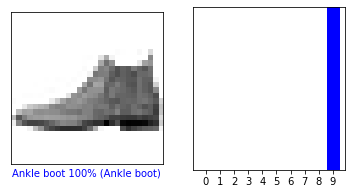

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

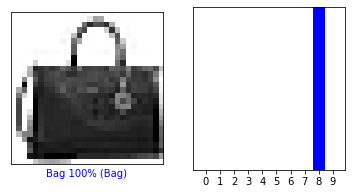

In [0]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们绘制一些带有预测的图像。请注意，即使非常自信，该模型也可能是错误的。

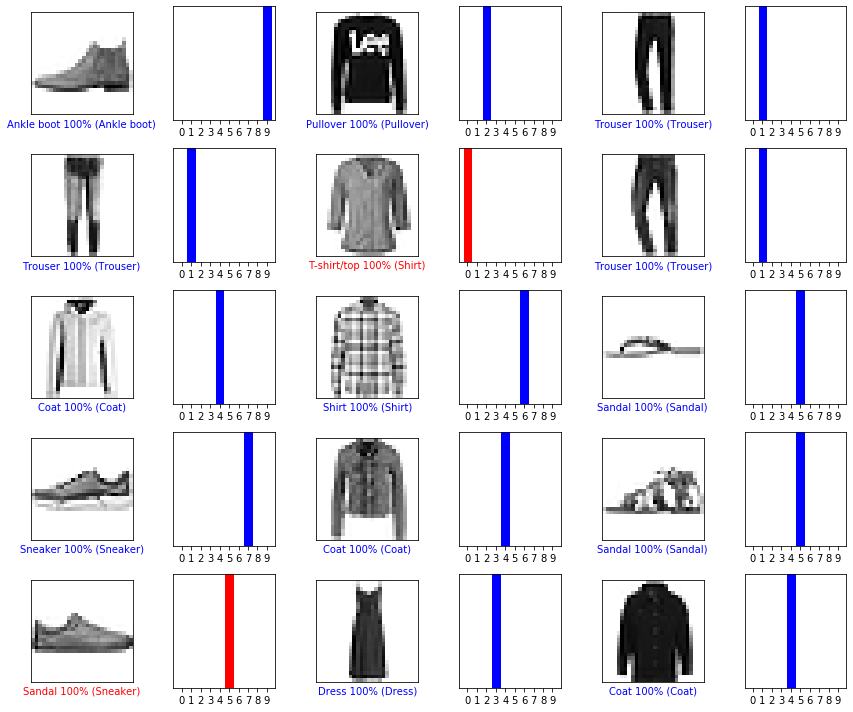

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

最后，使用经过训练的模型对单个图像进行预测。

In [0]:
img = test_images[1]
print(img.shape)

(28, 28)


tf.keras对模型进行了优化，可以一次对一批或一批示例进行预测。因此，即使您使用的是单个图像，也需要将其添加到列表中：

In [0]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在，为该图像预测正确的标签：

In [0]:
predictions_single = model.predict(img)
print(predictions_single)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


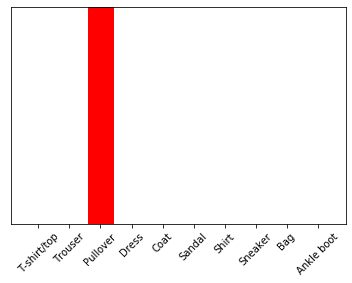

In [0]:
plot_value_array(i,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

model.predict返回列表列表-数据批次中每个图像的一个列表。批量获取我们（唯一）图像的预测：

In [0]:
np.argmax(predictions_single[0])

2

该模型将按预期预测标签。